In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
import time
import warnings
import statsmodels.api as sm
import datetime
import pyproj
from pyproj import Transformer
warnings.filterwarnings('ignore')

from my_functions import sat_vap_press, vap_press, hot_dry_windy, haines

In [4]:
dat = nc.Dataset('/data2/lthapa/2020/AC_LST/MOD11A1.006_1km_aid0001.nc')
print(dat)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: MOD11A1.006 for aid0001
    Conventions: CF-1.6
    institution: Land Processes Distributed Active Archive Center (LP DAAC)
    source: AppEEARS v3.2
    references: See README.md
    history: See README.md
    dimensions(sizes): time(72), ydim(974), xdim(1957)
    variables(dimensions): int8 crs(), int32 time(time), float64 ydim(ydim), float64 xdim(xdim), int32 Clear_day_cov(time, ydim, xdim), int32 Clear_night_cov(time, ydim, xdim), int16 Day_view_angl(time, ydim, xdim), int16 Day_view_time(time, ydim, xdim), int32 LST_Day_1km(time, ydim, xdim), int32 LST_Night_1km(time, ydim, xdim), int16 Night_view_angl(time, ydim, xdim), int16 Night_view_time(time, ydim, xdim), int16 QC_Day(time, ydim, xdim), int16 QC_Night(time, ydim, xdim)
    groups: 


In [5]:
x = dat['xdim'][:]
y = dat['ydim'][:]
X,Y = np.meshgrid(x,y)
print(X.shape)
print(len(x), len(y))

(974, 1957)
1957 974


In [7]:
sinu = pyproj.CRS("+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m +no_defs")
wsg84 = pyproj.CRS('EPSG:4326')
t = Transformer.from_crs(sinu,wsg84, always_xy=True)

lon, lat = t.transform(X,Y)

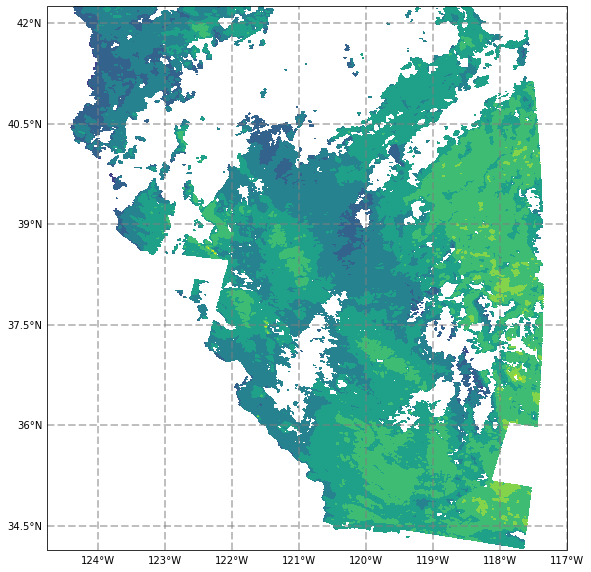

In [10]:
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
plt.contourf(lon, lat, dat['LST_Day_1km'][1,:])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,\
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
plt.show()